# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading the data

In [3]:
df = pd.read_csv(f"{path}/data/kaggle_linkedin_dataset/postings.csv")
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 123849
Number of columns in the dataset: 31


### Overview of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### Null value report

In [6]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [7]:
null_value_report(df)

,column,Count,Percentage
0,job_id,0,0.000000
1,company_name,1719,1.387981
2,title,0,0.000000
3,description,7,0.005652
4,max_salary,94056,75.944093
5,pay_period,87776,70.873402
6,location,0,0.000000
7,company_id,1717,1.386366
8,views,1689,1.363757
9,med_salary,117569,94.929309


## Categorizing columns

In [8]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [9]:
get_cardinality(df)

,column,Count,Unique Percentage
0,job_id,123849,100.000000
1,company_name,24428,19.724019
2,title,72521,58.555983
3,description,107827,87.063279
4,max_salary,5321,4.296361
5,pay_period,5,0.004037
6,location,8526,6.884190
7,company_id,24474,19.761161
8,views,684,0.552285
9,med_salary,1417,1.144135


In [10]:
numerical_columns = ["max_salary", "views", "med_salary", "min_salary", "applies", "original_listed_time", "expiry", "closed_time", "listed_time", "normalized_salary", "fips"]

categorical_columns = ["job_id", "company_name", "title", "pay_period", "location", "company_id", "formatted_work_type", "remote_allowed", "job_posting_url", "application_url", "application_type", "formatted_experience_level", "posting_domain", "sponsored", "work_type", "currency", "compensation_type", "zip_code"]
text_columns = ["description", "skills_desc"]

In [11]:
assert(len(numerical_columns + categorical_columns + text_columns) == df.shape[1])

In [12]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 11
Number of Categorical columns: 18
Number of Text columns: 2


## EDA

### Numerical columns

#### Null value report

In [13]:
null_value_report(df[numerical_columns])

,column,Count,Percentage
0,max_salary,94056,75.944093
1,views,1689,1.363757
2,med_salary,117569,94.929309
3,min_salary,94056,75.944093
4,applies,100529,81.170619
5,original_listed_time,0,0.000000
6,expiry,0,0.000000
7,closed_time,122776,99.133622
8,listed_time,0,0.000000
9,normalized_salary,87776,70.873402


#### Statistics

In [14]:
df[numerical_columns].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,max_salary,views,med_salary,min_salary,applies,original_listed_time,expiry,closed_time,listed_time,normalized_salary,fips
count,2.979300e+04,122160.00,6280.00,29793.00,23320.00,1.238490e+05,1.238490e+05,1.073000e+03,1.238490e+05,3.607300e+04,96434.00
mean,9.193942e+04,14.62,22015.62,64910.85,10.59,1.713152e+12,1.716213e+12,1.712928e+12,1.713204e+12,2.053270e+05,28713.88
std,7.011101e+05,85.90,52255.87,495973.79,29.05,4.848209e+08,2.321394e+09,3.622893e+08,3.989122e+08,5.097627e+06,16015.93
min,1.000000e+00,1.00,0.00,1.00,1.00,1.701811e+12,1.712903e+12,1.712346e+12,1.711317e+12,0.000000e+00,1003.00
5%,2.000000e+01,2.00,15.00,16.70,1.00,1.712349e+12,1.714961e+12,1.712388e+12,1.712370e+12,3.328000e+04,6019.00
25%,4.828000e+01,3.00,18.94,37.00,1.00,1.712863e+12,1.715481e+12,1.712670e+12,1.712886e+12,5.200000e+04,13121.00
50%,8.000000e+04,4.00,25.50,60000.00,3.00,1.713395e+12,1.716042e+12,1.712670e+12,1.713408e+12,8.150000e+04,29183.00
75%,1.400000e+05,8.00,2510.50,100000.00,8.00,1.713478e+12,1.716088e+12,1.713283e+12,1.713484e+12,1.250000e+05,42077.00
95%,2.450000e+05,48.00,120000.00,166080.00,45.00,1.713561e+12,1.716159e+12,1.713463e+12,1.713564e+12,2.000000e+05,51840.00
max,1.200000e+08,9975.00,750000.00,85000000.00,967.00,1.713573e+12,1.729125e+12,1.713562e+12,1.713573e+12,5.356000e+08,56045.00


#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

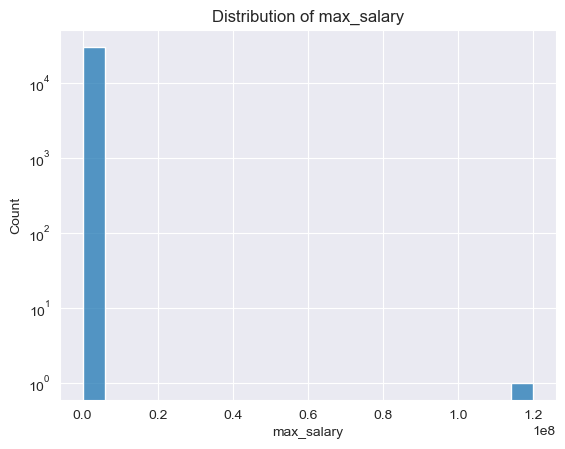

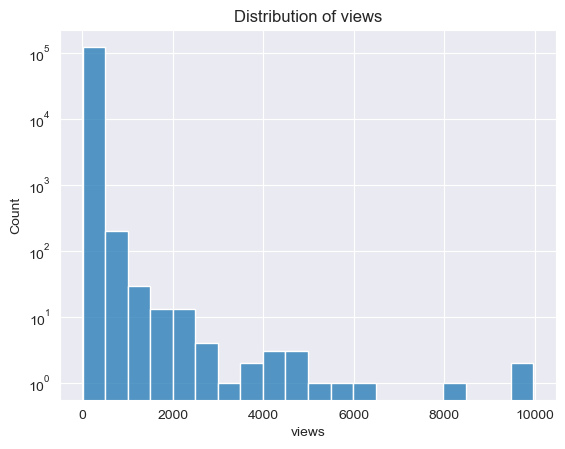

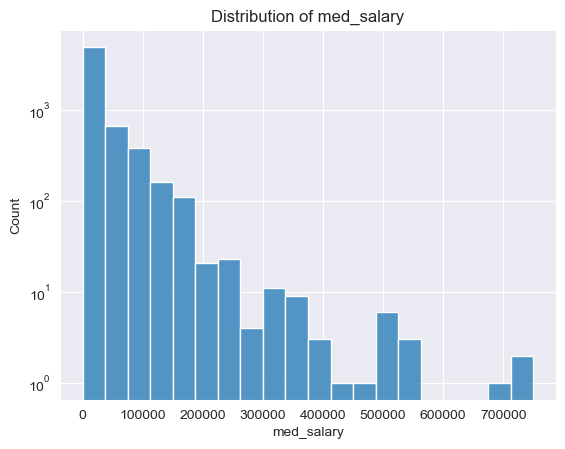

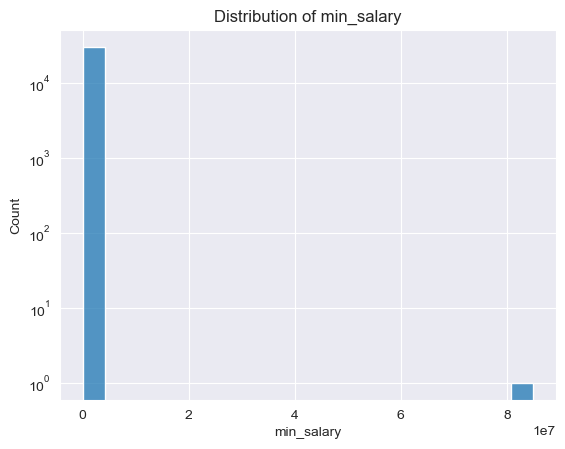

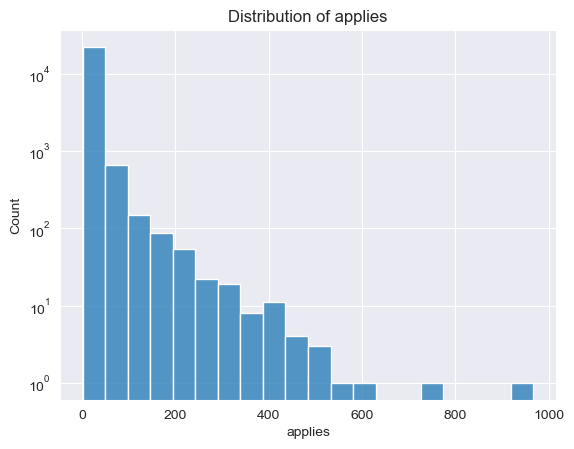

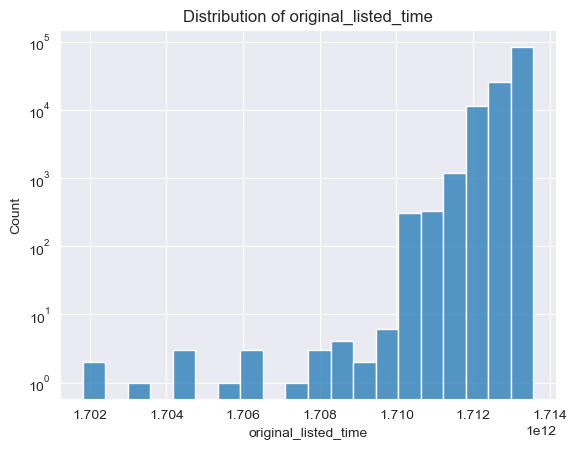

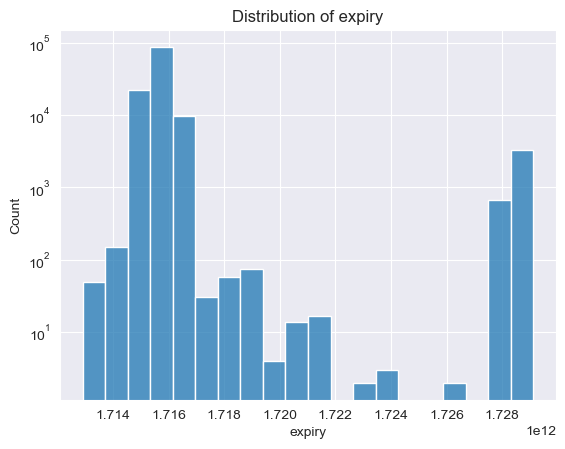

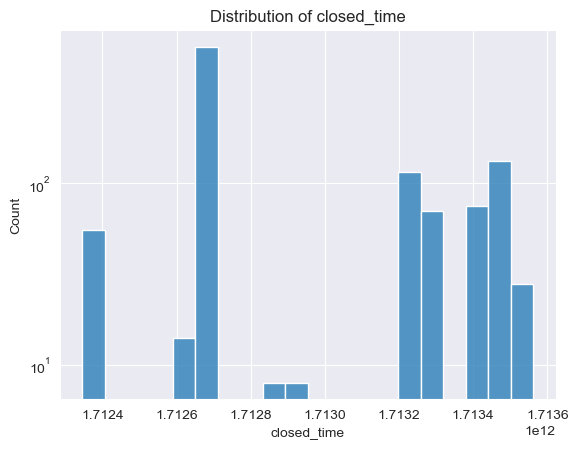

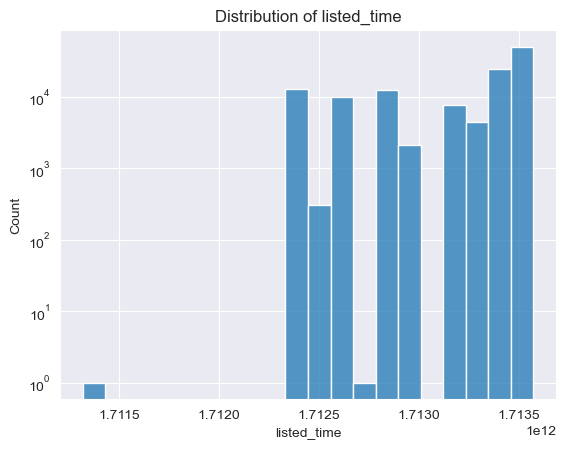

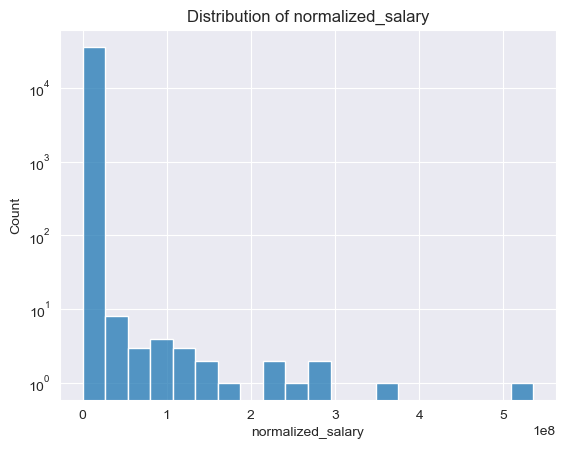

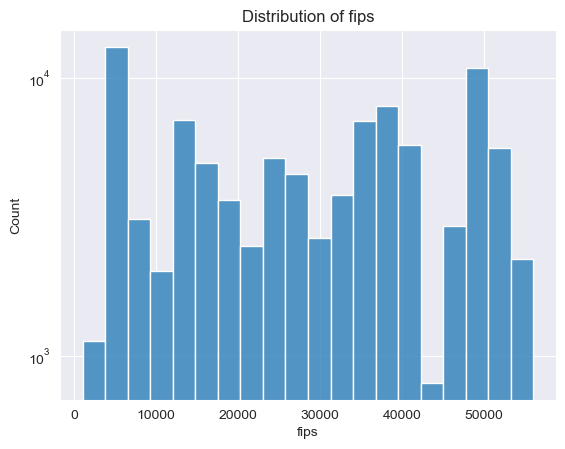

In [16]:
for i in numerical_columns:
    plot_histogram(df, i)

### Categorical columns

#### Null value report

In [17]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,job_id,0,0.000000
1,company_name,1719,1.387981
2,title,0,0.000000
3,pay_period,87776,70.873402
4,location,0,0.000000
5,company_id,1717,1.386366
6,formatted_work_type,0,0.000000
7,remote_allowed,108603,87.689848
8,job_posting_url,0,0.000000
9,application_url,36665,29.604599


#### Statistics

In [18]:
df[categorical_columns].describe(include=['object'])

,company_name,title,pay_period,location,formatted_work_type,job_posting_url,application_url,application_type,formatted_experience_level,posting_domain,work_type,currency,compensation_type
count,122130,123849,36073,123849,123849,123849,87184,123849,94440,83881,123849,36073,36073
unique,24428,72521,5,8526,7,123849,84800,4,6,4443,7,6,1
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,YEARLY,United States,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,https://app.dataannotation.tech/worker_signup?...,OffsiteApply,Mid-Senior level,www.click2apply.net,FULL_TIME,USD,BASE_SALARY
freq,1108,673,20628,8125,98814,1,205,84607,41489,3811,98814,36058,36073


#### Count plots

In [19]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


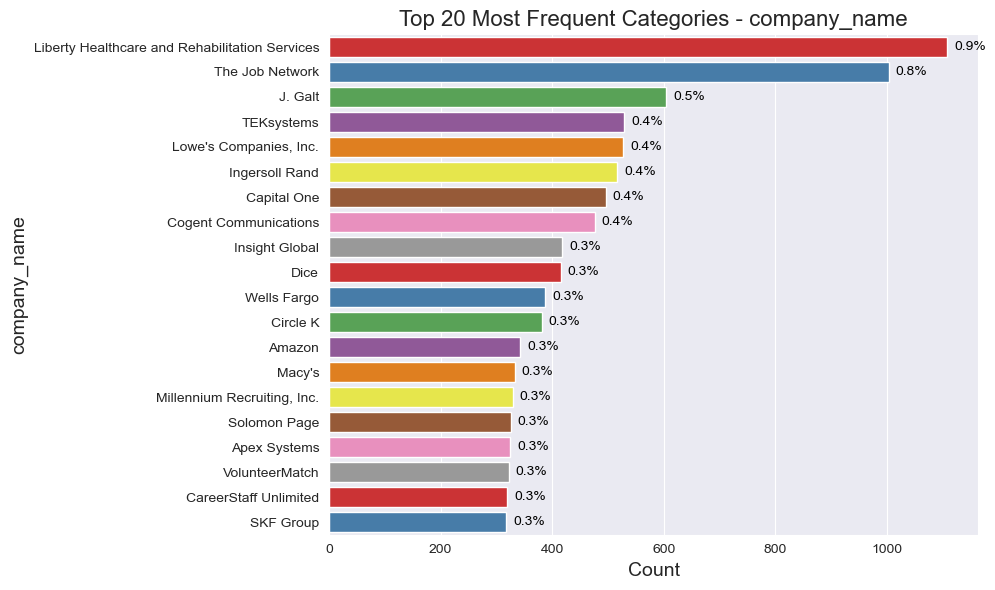

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


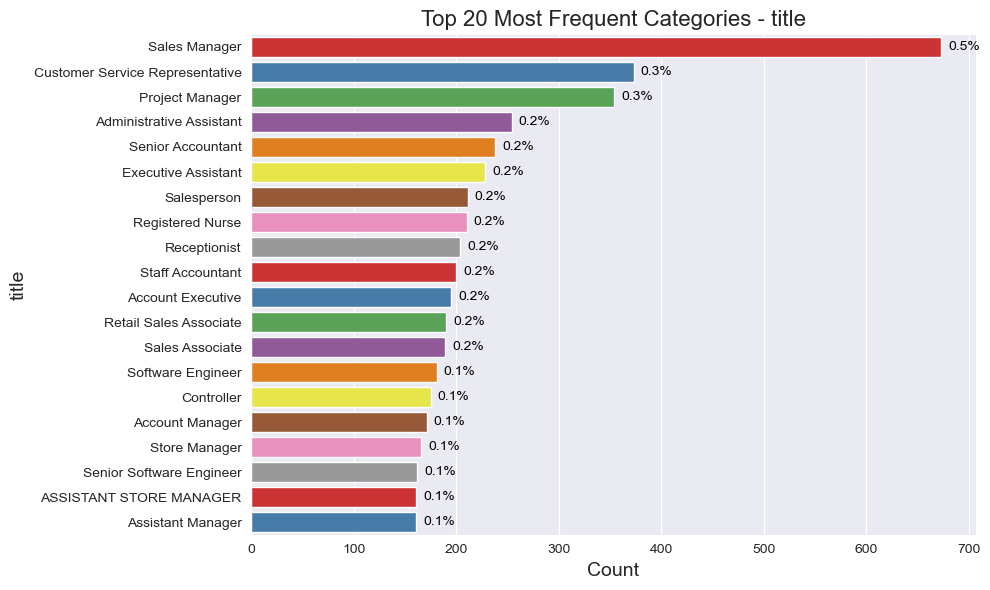

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


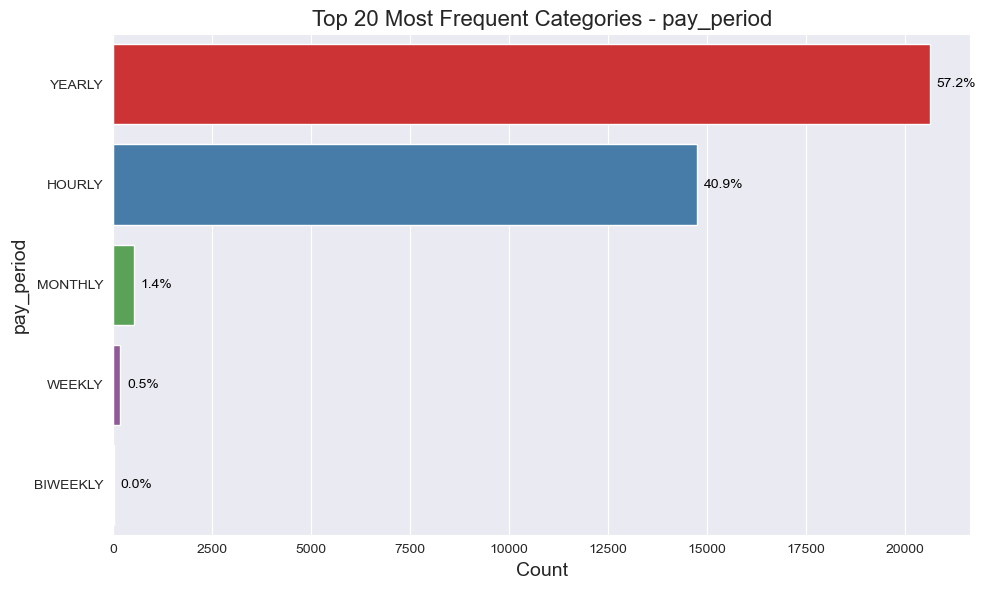

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


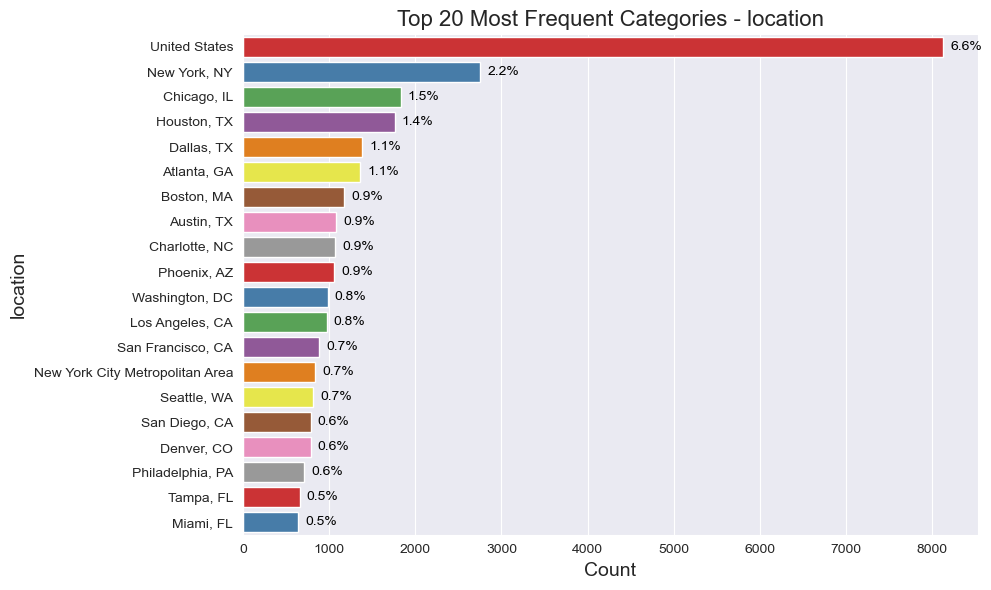

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


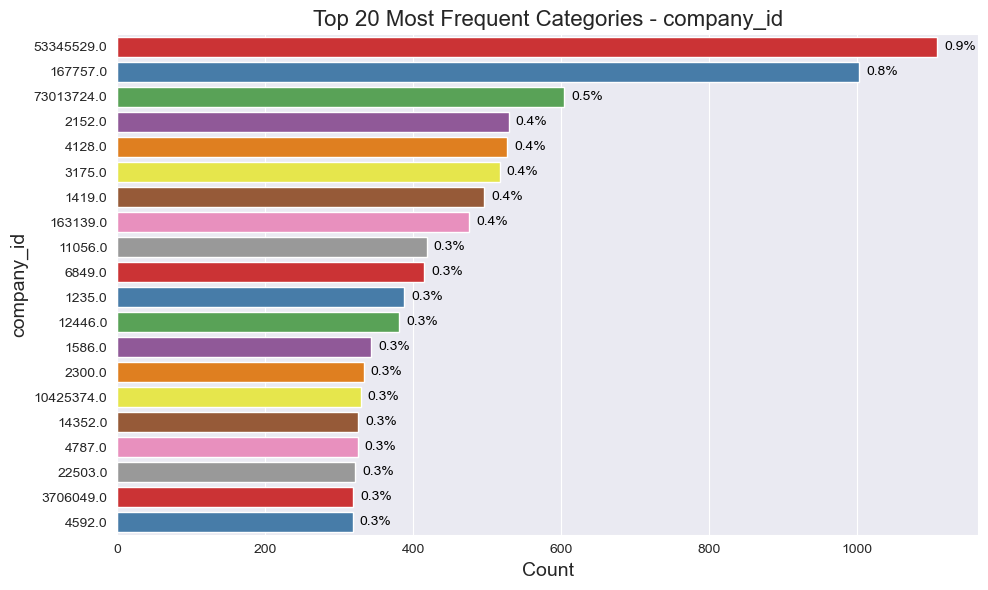

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


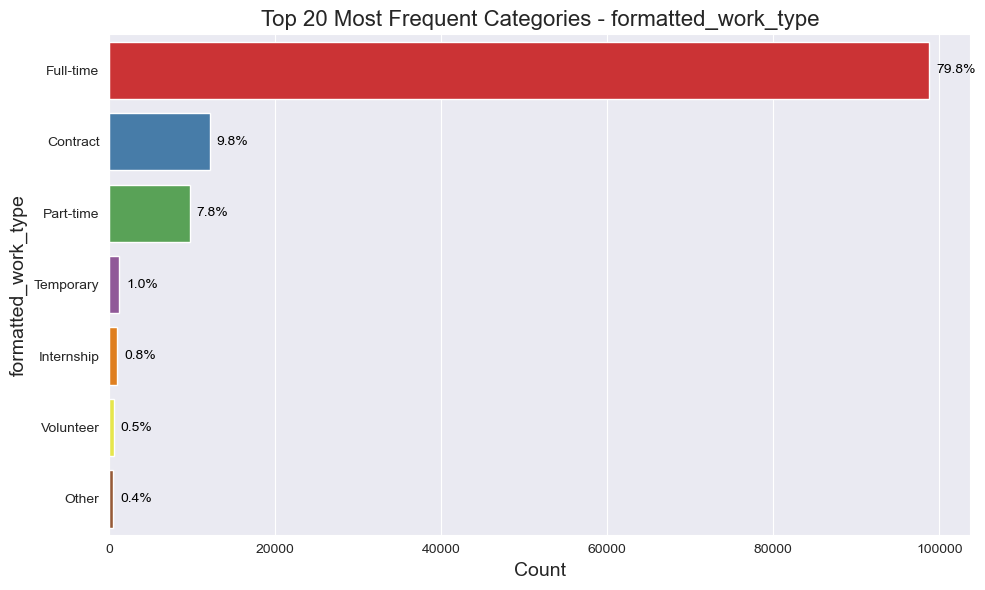

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


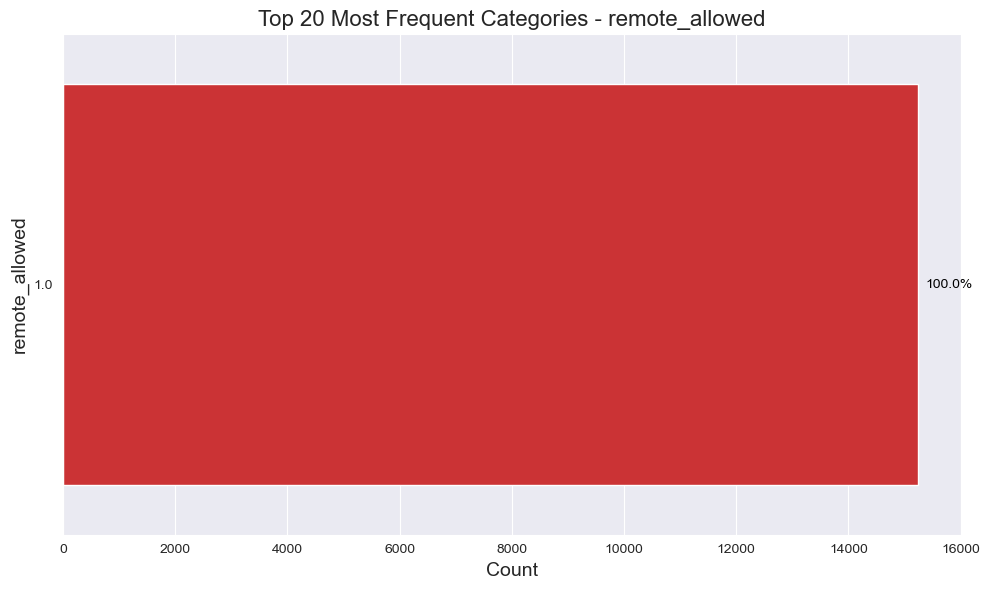

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


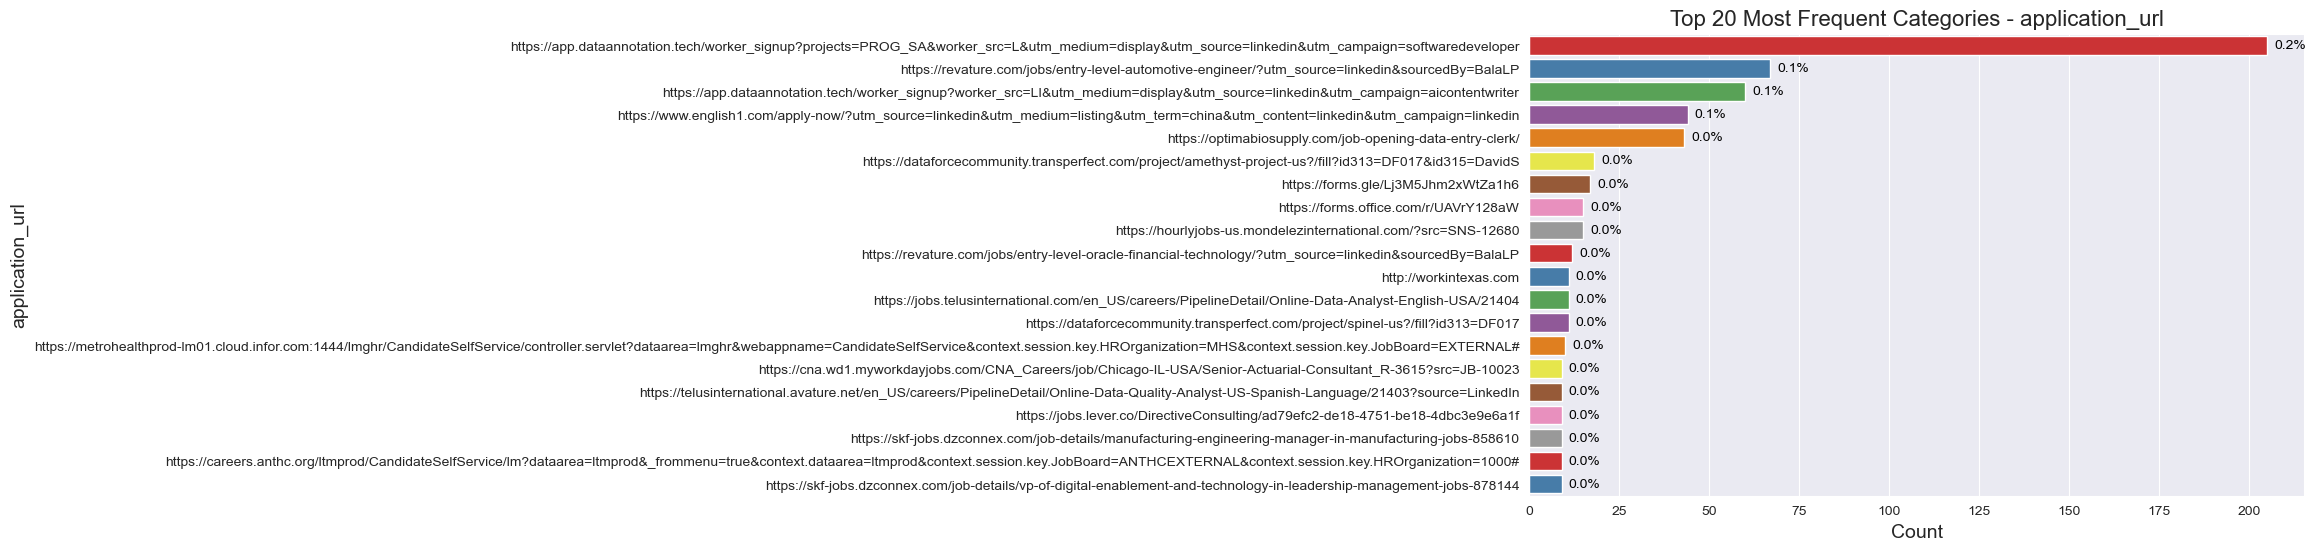

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


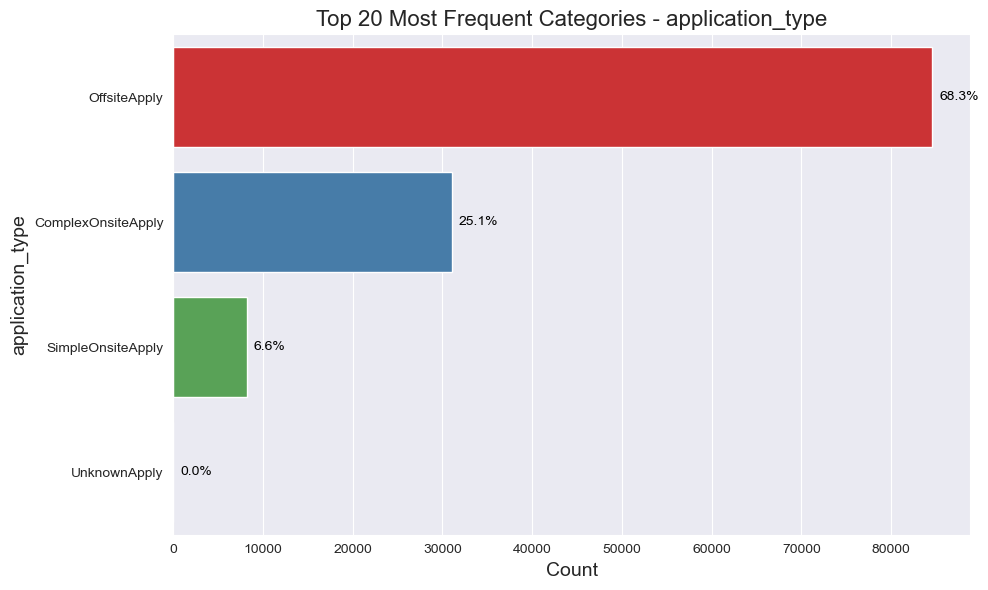

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


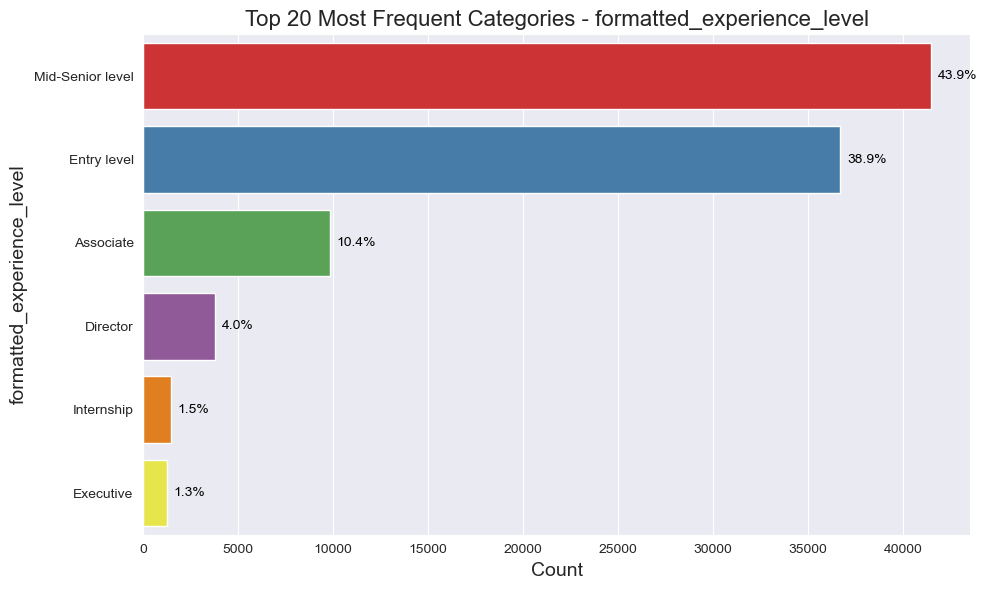

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


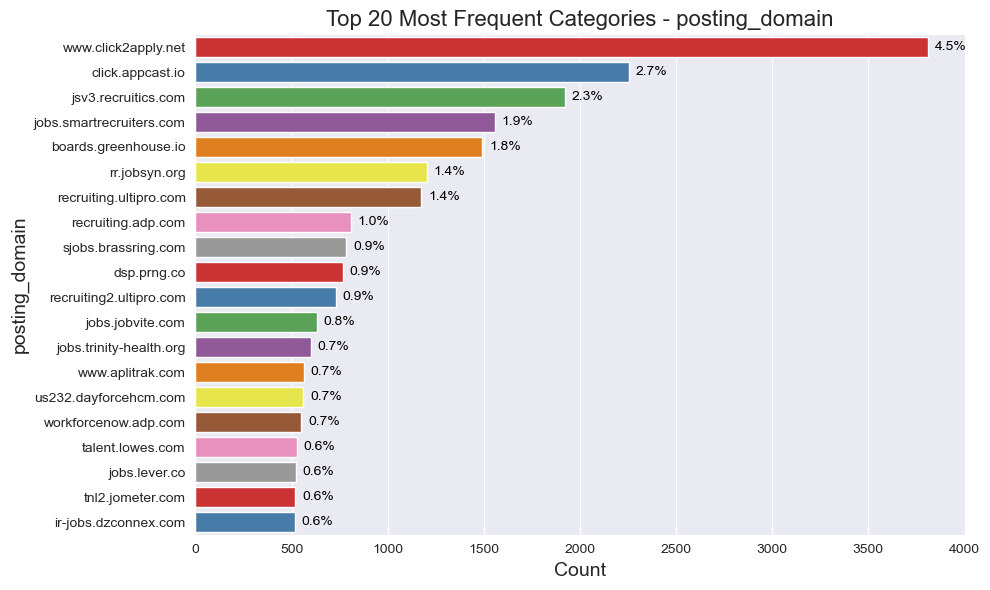

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


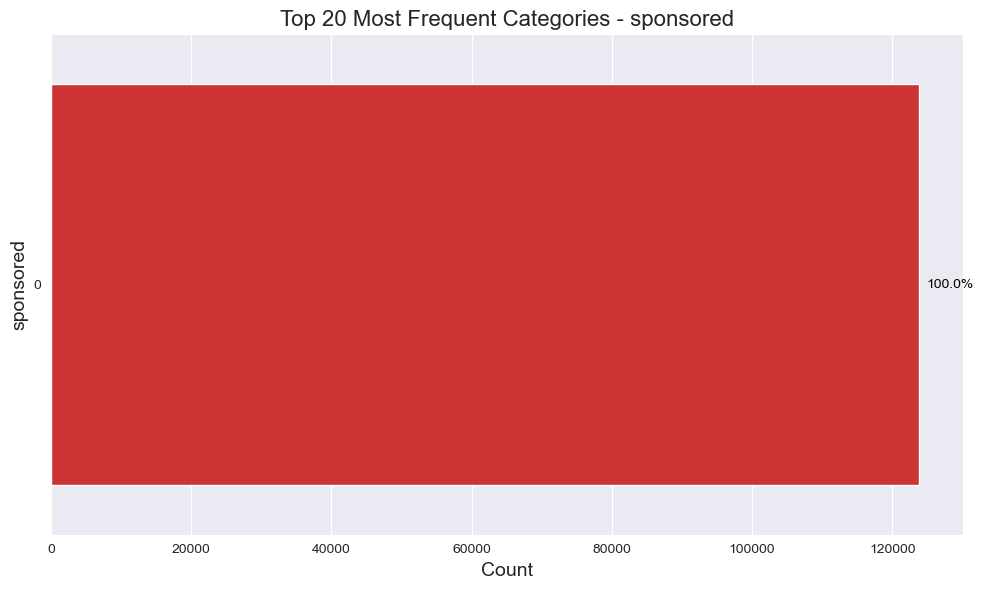

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


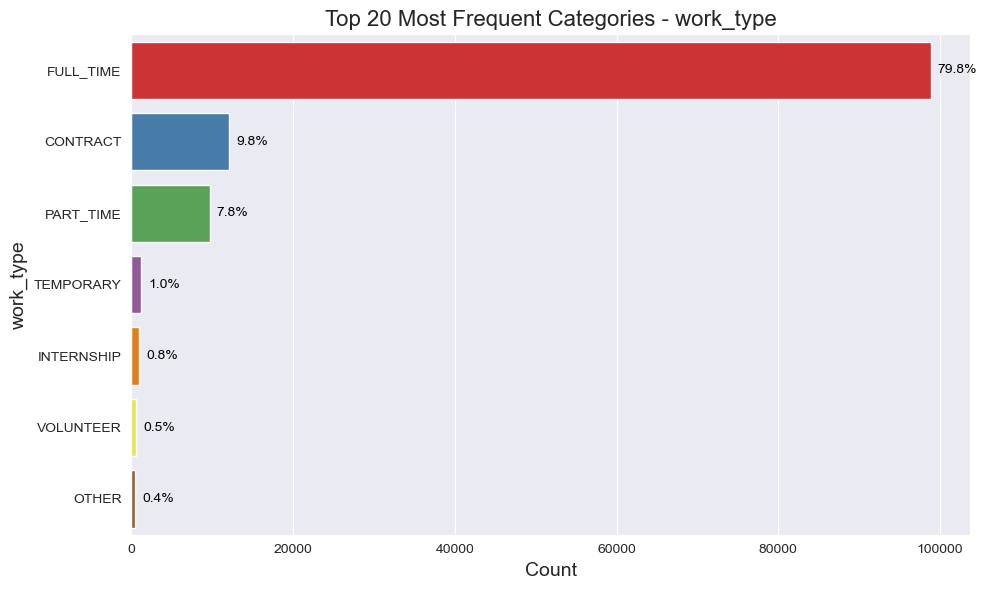

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


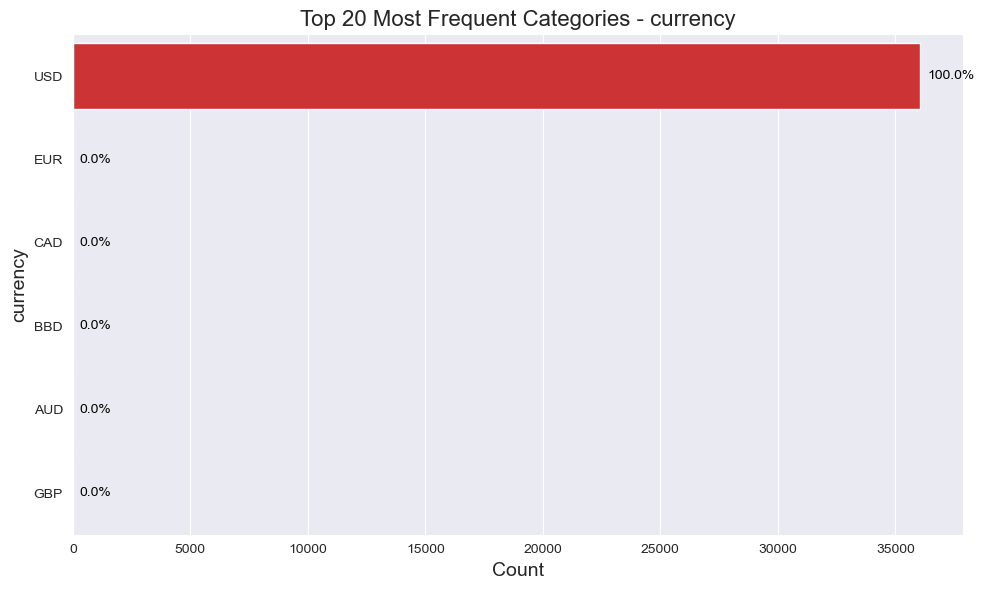

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


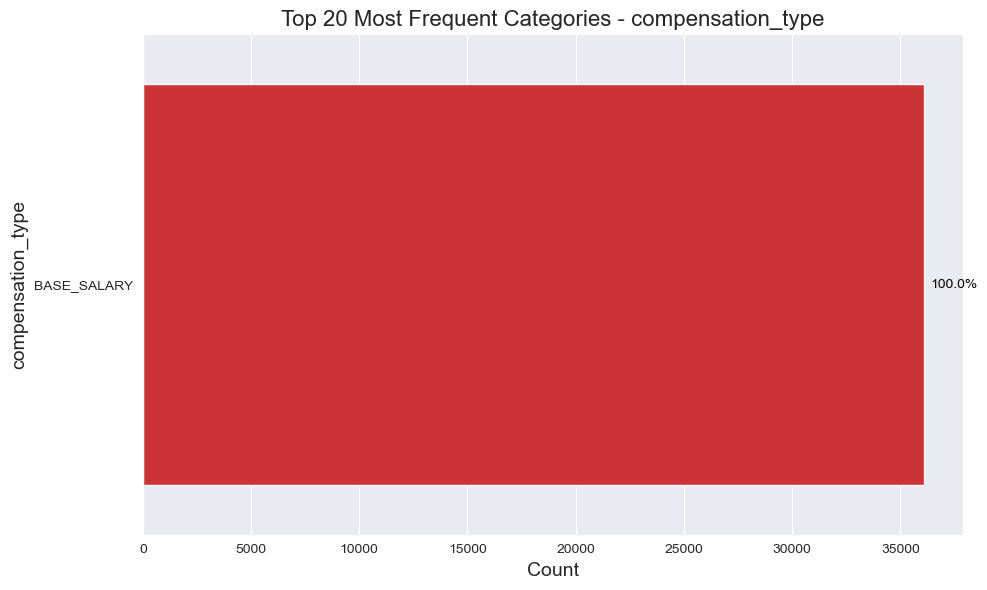

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_25628/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


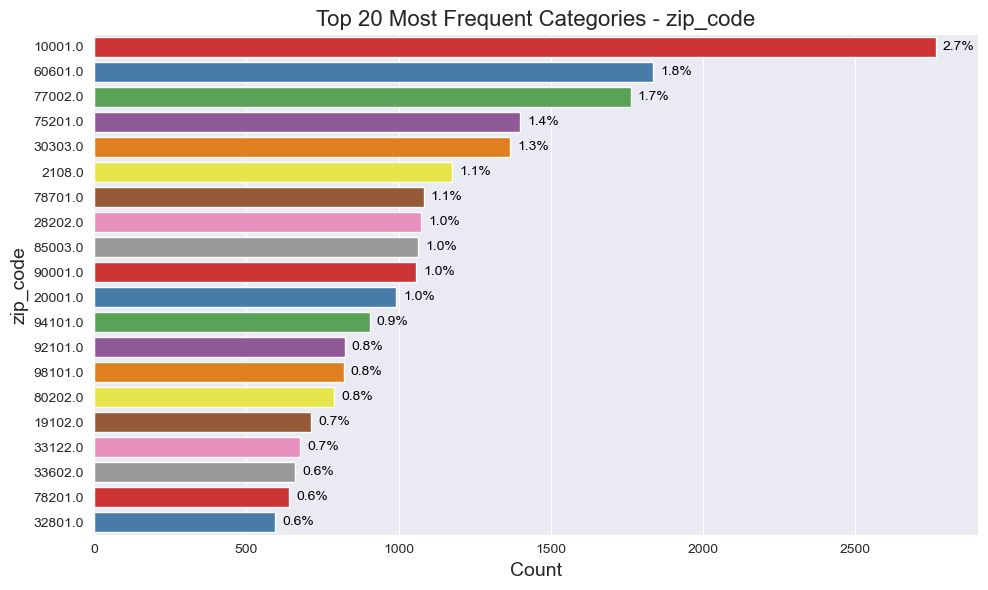

In [20]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [21]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,description,7,0.005652
1,skills_desc,121410,98.030666


#### Text lengths

In [22]:
temp = df[text_columns].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,description,skills_desc,description_len,skills_desc_len
0,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,2526,293
1,"At Aspen Therapy and Wellness , we are committ...",,3560,0
2,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,462,471
3,Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,1599,474
4,Looking for HVAC service tech with experience ...,,232,0
...,...,...,...,...
123844,Our Walnut Creek office is currently seeking a...,,2002,0
123845,About Pinterest:\n\nMillions of people across ...,,5402,0
123846,Company Overview\n\nEPS Learning is a leading ...,,6428,0
123847,The Business Development Manager is a 'hunter'...,,3493,0


#### Text length statistics

In [25]:
temp[[f"{i}_len" for i in text_columns]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,description_len,skills_desc_len
count,123849.00,123849.00
mean,3766.25,4.04
std,2146.62,81.71
min,0.00,0.00
5%,929.00,0.00
25%,2176.00,0.00
50%,3435.00,0.00
75%,4986.00,0.00
95%,7688.20,0.00
max,23201.00,3602.00


#### Text length histograms

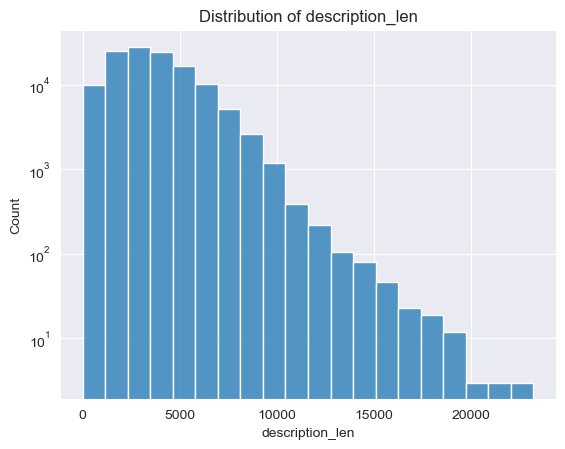

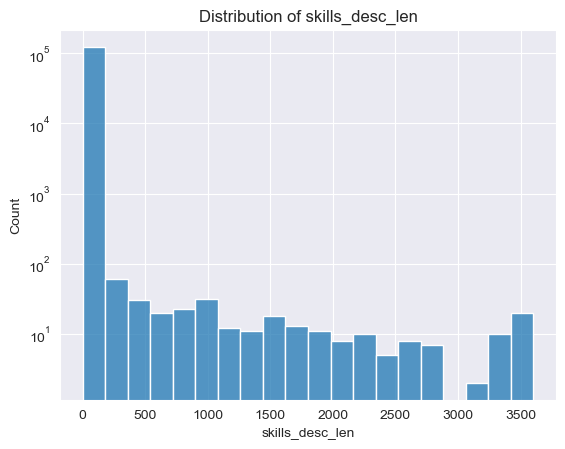

In [26]:
for i in [f"{i}_len" for i in text_columns]:
    plot_histogram(temp, i)

The most important columns for our dataset would be the "description", "skills_desc" columns. These columns will be important in getting predictions later on and also generating synthetic resumes.

But there are a lot of null values in skills_desc. Therefore, they might also have to generated synthetically.